### **Задание №1**. Предположим, что у вас в базе есть табличка с балансом по всем счетам клиента на конец дня. Из-за особенностей построения таблицы, часть значений незаполнена и физически это означает отсутствие информации об изменении баланса. Для простоты будем считать, пропущенные значения для одного пользователя не могут встретиться между двумя заполненными. Напишите SQL запрос для заполнения неизвестных значений по каждому клиенту последним известным.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | NaN
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | NaN
3 | 18.04.2020 | NaN


In [ ]:
SELECT client_id, date, ISNULL(value, (SELECT TOP 1 value FROM Table WHERE 
                        date < t.date and value is not null and client_id=t.client_id
                        ORDER BY date DESC)) FROM Table t

### **Задание №1.1 (*)**. В прошлом задании мы считали, что пропущенные значения не могут находиться между двумя заполненными в рамках одного пользователя, что не всегда правда в реальных задачах. Напишите теперь SQL запрос без указанного допущения.

client_id |date | value
--- | --- | ---
1 | 14.04.2020 | 10000
1 | 15.04.2020 | 5000
1 | 16.04.2020 | NaN
1 | 17.04.2020 | 7000
1 | 18.04.2020 | NaN
2 | 14.04.2020 | 250000
2 | 15.04.2020 | 250000
2 | 16.04.2020 | 230000
2 | 17.04.2020 | 230000
2 | 18.04.2020 | 225000
3 | 14.04.2020 | 50000
3 | 15.04.2020 | NaN
3 | 16.04.2020 | NaN
3 | 17.04.2020 | 49000
3 | 18.04.2020 | NaN

In [ ]:
# <YOUR_CODE_HERE>

### **Задание №2**. Пусть клиенты обладают рядом статусов, закодированных цифрами: 0 - "улица", 1 - "зарплатник", 2 - "премиум", 3 - "пенсионер", 4 - "студент". У нас есть матрица с логами смен статусов за некоторый период, разверните ее в матрицу статус - статус с частотами перехода между ними.

Пример, как было:

client_id | prev_segment | new_segment|
--- | --- | ---
1 | 0 | 1
2 | 0 | 2
3 | 4 | 3

Пример, как нужно:

segment |0 | 1 | 2 | 3 | 4 
--- | --- | --- | --- | --- | ---
0 | 0 | 0.5 | 0.5 | 0 | 0 
1 | 0 |0 | 0 | 0 | 0
2 | 0 | 0 | 0 | 0 | 0
3 | 0 | 0 | 0 | 0 | 0
4 | 0 | 0 | 0 | 1 | 0

В процессе выполнения задания разрешается пользоваться библиотеками numpy и pandas.

In [ ]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=5, size=(500000, 2)),
    columns=['prev_segment', 'new_segment']
)

In [ ]:
A=np.zeros([5, 5])
for i in range(5):
  for j in range(5):
    if i in np.array(data.prev_segment):
      A[i,j]=data[(data.prev_segment == i) & (data.new_segment == j)].shape[0]/len(np.array(data.prev_segment)[np.array(data.prev_segment)==i])
    else:
      A[i,j]=0

In [ ]:
print(A)

[[0.20071621 0.20028966 0.19898025 0.19859338 0.20142051]
 [0.2004065  0.19872443 0.20133765 0.19911491 0.20041651]
 [0.20199244 0.19955456 0.19907301 0.20037722 0.19900278]
 [0.20218541 0.19572533 0.20079324 0.20170466 0.19959136]
 [0.19997395 0.1967172  0.20011424 0.20166745 0.20152716]]


### **Задание №2.1 (*)**. Если вы не пользовались библиотечными функциями и реализовывали алгоритм самостоятельно, напишите, пожалуйста, его асимптотическую сложность в терминах O-большое.

In [ ]:
# <YOUR_CODE_HERE>

### **Задание №3**. Постройте прогнозую модель для датасета с UCI Machine Learning: предобработайте категориальные фичи, отберите их, соберите схему валидации и отберите модели с помощью нее. Описание датасета по ссылке: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Данная задача multilabel multiclass classification, поэтому предлагаю начать с одного из подходов:
- Свести задачу к multilabel binary classification, как это указано в описании к датасету;
- Свести задачку к binary classification тем или иным способом;
- Обучить множество multiclass/binary classification моделей;
- Что-то еще, что придет в голову.


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data

--2021-04-27 14:04:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346695 (339K) [application/x-httpd-php]
Saving to: ‘drug_consumption.data.2’

drug_consumption.da 100%[===================>] 338.57K  1.15MB/s    in 0.3s    

2021-04-27 14:04:43 (1.15 MB/s) - ‘drug_consumption.data.2’ saved [346695/346695]



In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('drug_consumption.data', header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Отберем фичи

In [ ]:
df=data.iloc[:,0:12]
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [ ]:
from sklearn import preprocessing

In [ ]:
# кодирование категорий-строк натуральными числами
label_enc = preprocessing.LabelEncoder()
for feature in df.columns: 
    df[feature] = label_enc.fit_transform(df[feature])

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1,2,1,5,6,5,27,19,16,17,24,3,2
2,1,0,8,6,2,17,35,29,28,23,2,5
3,2,0,5,6,2,19,28,14,12,16,1,7
4,0,1,7,6,2,22,17,20,27,28,1,2
5,2,1,8,6,2,31,11,17,21,32,3,5


In [ ]:
# применение one-hot ecnoding
enc = preprocessing.OneHotEncoder(sparse=False)
X_cat_np = enc.fit_transform(df[df.columns])
X_cat_pd = pd.DataFrame(data=X_cat_np)

In [ ]:
X_cat_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# закодируем метки классов цифрами
y=data.iloc[:,12:31].values
for i in range(y.shape[0]):
  for j in range(y.shape[1]):
    if  y[i,j] == 'CL0':
      y[i,j] = 1
    elif y[i,j] == 'CL1':
      y[i,j] = 2
    elif y[i,j] == 'CL2':
      y[i,j] = 3
    elif y[i,j] == 'CL3':
      y[i,j] = 4
    elif y[i,j] == 'CL4':
      y[i,j] = 5
    else:
      y[i,j] = 6

In [ ]:
y_all = pd.DataFrame(data=y,dtype='int')

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])

In [ ]:
Data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3,1,3,6,1,6,1,1,1,1,1,1,1,1,1,3,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,3,3,1,6,5,6,4,1,5,1,3,1,3,4,1,5,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,1,1,1,6,4,5,1,1,1,1,1,1,1,1,2,1,1,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,4,6,3,5,3,1,1,1,3,1,1,1,1,3,1,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,2,2,1,6,4,6,1,1,2,1,1,2,1,1,3,3,1,1


Задача состоит в том, чтобы классифицировать употребление наркотических препаратов по 6-ти различным категориям. 
Для каждого препарата мы будем проводить отдельную классификацию.
Давайте посмотрим на алгоритм многоклассовой классификации для алкоголя.
На рисунке ниже показано распределение значений зависимой переменной. Как видно, классы несбалансированы. Для многоклассовой классификации с несбалансированными классами нужно разбить задачу на несколько бинарных классификаций. 

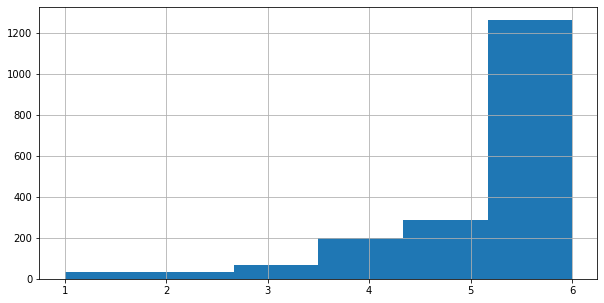

In [ ]:
Data['f260'].hist(bins=Data['f260'].nunique(), figsize=(10,5));

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import accuracy_score

Для 6 и всех остальных (6 класс оставляем, все остальные кодируем 0)

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data.loc[~Data['f260'].isin([6]), 'f260'] = 0 # заменяем метки классов на 0 (кроме 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data['f260'], test_size=0.2, random_state=17)

In [ ]:
## Random forest
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.6684350132625995

Для 5 и всех остальных (кроме 6)

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data = Data[Data['f260'] != 6] # отбрасываем 6 класс
Data.loc[~Data['f260'].isin([5]), 'f260'] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data['f260'], test_size=0.2, random_state=17)

In [ ]:
## Random forest
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.496

Для 4 и всез остальных (кроме 5,6)

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data = Data[Data['f260'] != 6] # отбрасываем 6 класс
Data = Data[Data['f260'] != 5] # отбрасываем 5 класс
Data.loc[~Data['f260'].isin([4]), 'f260'] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data['f260'], test_size=0.2, random_state=17)

In [ ]:
## Random forest
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.5522388059701493

Многоклассовая коассификация для всех остальных классов

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data = Data[Data['f260'] != 6] # отбрасываем 6 класс
Data = Data[Data['f260'] != 5] # отбрасываем 5 класс
Data = Data[Data['f260'] != 4] # отбрасываем 4 класс

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data['f260'], test_size=0.2, random_state=17)

In [ ]:
## Random forest
rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.5

Приблизительная точность (accuracy) модели бинарной класиификации является взвешенная сумма по вышеприведенным моделям, где весом является удельный размер класса во всей выборке.

Так как наркотических препаратов 18 штук, то для сокращения длины кода была написана функция culc_acc, которая возвращает список accuracy для каждого препарата (этот список accuracy нужен для рассчета accuracy всей модели)

In [ ]:
def culc_acc(X_cat_pd, y_all,lable,drug):
  # Вычисляем acc для 1-го самого большого класса
  acc=[]
  lable=lable
  drug=drug
  Data = pd.concat([X_cat_pd, y_all], axis=1)
  Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
  Data.loc[~Data[drug[0]].isin([lable[0]]), drug[0]] = 0
  X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data[drug[0]], test_size=0.2, random_state=17)
  ## Random forest
  rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  acc.append(accuracy_score(y_test, rf_pred))
  # вычисляем acc для второго самого большого класса (1 удаляем)
  Data = pd.concat([X_cat_pd, y_all], axis=1)
  Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
  Data = Data[Data[drug[0]] != lable[0]] # отбрасываем 6 класс
  Data.loc[~Data[drug[0]].isin([lable[1]]), drug[0]] = 0
  X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data[drug[0]], test_size=0.2, random_state=17)
  ## Random forest
  rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  acc.append(accuracy_score(y_test, rf_pred))
  # вычисляем acc для третьего самого большого класса (1 и 2 удаляем)
  Data = pd.concat([X_cat_pd, y_all], axis=1)
  Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
  Data = Data[Data[drug[0]] != lable[0]]
  Data = Data[Data[drug[0]] != lable[1]]
  Data.loc[~Data[drug[0]].isin([lable[2]]), drug[0]] = 0
  X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data[drug[0]], test_size=0.2, random_state=17)
  ## Random forest
  rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  acc.append(accuracy_score(y_test, rf_pred))
  # Многоклассовая классифмкация для всех остальных классов
  Data = pd.concat([X_cat_pd, y_all], axis=1)
  Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
  Data = Data[Data[drug[0]] != lable[0]]
  Data = Data[Data[drug[0]] != lable[1]]
  Data = Data[Data[drug[0]] != lable[2]]
  X_train, X_test, y_train, y_test = train_test_split(
    Data.loc[:,'f0':'f259'], Data[drug[0]], test_size=0.2, random_state=17)
  ## Random forest
  rf = ensemble.RandomForestClassifier(n_estimators=20, class_weight='balanced')
  rf.fit(X_train, y_train)
  rf_pred = rf.predict(X_test)
  acc.append(accuracy_score(y_test, rf_pred))
  return acc



Расчет accuracy модели для каждого препарата

# Alcohol

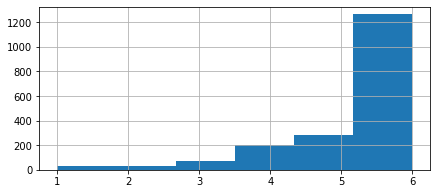

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f260'].hist(bins=Data['f260'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f260'].value_counts()[6]/Data['f260'].value_counts().sum()
weight2 = Data['f260'].value_counts()[5]/Data['f260'].value_counts().sum()
weight3 = Data['f260'].value_counts()[4]/Data['f260'].value_counts().sum()
weight_rest = (Data['f260'].value_counts().sum() - weight1*Data['f260'].value_counts().sum() - weight2*Data['f260'].value_counts().sum() - weight3*Data['f260'].value_counts().sum())/Data['f260'].value_counts().sum()
acc_alcohol=culc_acc(X_cat_pd, y_all,lable=[6,5,4],drug=['f260'])
Acc_alcohol=weight1*acc_alcohol[0]+weight2*acc_alcohol[1]+weight3*acc_alcohol[2]+weight_rest*acc_alcohol[3]
Acc_alcohol

0.6101728093765565

Amphet

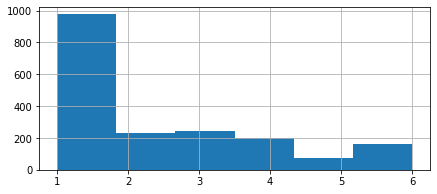

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f261'].hist(bins=Data['f261'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f261'].value_counts()[1]/Data['f261'].value_counts().sum()
weight2 = Data['f261'].value_counts()[3]/Data['f261'].value_counts().sum()
weight3 = Data['f261'].value_counts()[2]/Data['f261'].value_counts().sum()
weight_rest = (Data['f261'].value_counts().sum() - weight1*Data['f261'].value_counts().sum() - weight2*Data['f261'].value_counts().sum() - weight3*Data['f261'].value_counts().sum())/Data['f261'].value_counts().sum()
acc_amphet=culc_acc(X_cat_pd, y_all,lable=[1,3,2],drug=['f261'])
Acc_amphet=weight1*acc_amphet[0]+weight2*acc_amphet[1]+weight3*acc_amphet[2]+weight_rest*acc_amphet[3]
Acc_amphet

0.6308157079619897

Amyl

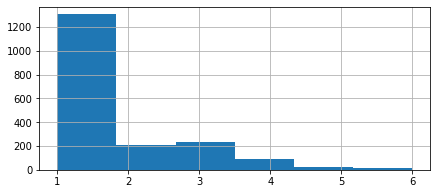

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f262'].hist(bins=Data['f262'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f262'].value_counts()[1]/Data['f262'].value_counts().sum()
weight2 = Data['f262'].value_counts()[3]/Data['f262'].value_counts().sum()
weight3 = Data['f262'].value_counts()[2]/Data['f262'].value_counts().sum()
weight_rest = (Data['f262'].value_counts().sum() - weight1*Data['f262'].value_counts().sum() - weight2*Data['f262'].value_counts().sum() - weight3*Data['f262'].value_counts().sum())/Data['f262'].value_counts().sum()
acc_amyl=culc_acc(X_cat_pd, y_all,lable=[1,3,2],drug=['f262'])
Acc_amyl=weight1*acc_amyl[0]+weight2*acc_amyl[1]+weight3*acc_amyl[2]+weight_rest*acc_amyl[3]
Acc_amyl

0.6986084419306138

Benzos

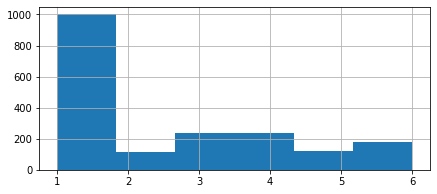

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f263'].hist(bins=Data['f263'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f263'].value_counts()[1]/Data['f263'].value_counts().sum()
weight2 = Data['f263'].value_counts()[3]/Data['f262'].value_counts().sum()
weight3 = Data['f263'].value_counts()[4]/Data['f263'].value_counts().sum()
weight_rest = (Data['f263'].value_counts().sum() - weight1*Data['f263'].value_counts().sum() - weight2*Data['f263'].value_counts().sum() - weight3*Data['f263'].value_counts().sum())/Data['f263'].value_counts().sum()
acc_benzos=culc_acc(X_cat_pd, y_all,lable=[1,3,4],drug=['f263'])
Acc_benzos=weight1*acc_benzos[0]+weight2*acc_benzos[1]+weight3*acc_benzos[2]+weight_rest*acc_benzos[3]
Acc_benzos

0.6155949209256207

Caff 

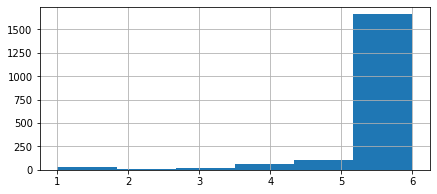

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f264'].hist(bins=Data['f264'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f264'].value_counts()[6]/Data['f264'].value_counts().sum()
weight2 = Data['f264'].value_counts()[5]/Data['f264'].value_counts().sum()
weight3 = Data['f264'].value_counts()[4]/Data['f264'].value_counts().sum()
weight_rest = (Data['f264'].value_counts().sum() - weight1*Data['f264'].value_counts().sum() - weight2*Data['f264'].value_counts().sum() - weight3*Data['f264'].value_counts().sum())/Data['f264'].value_counts().sum()
acc_caff=culc_acc(X_cat_pd, y_all,lable=[6,5,4],drug=['f264'])
Acc_caff=weight1*acc_caff[0]+weight2*acc_caff[1]+weight3*acc_caff[2]+weight_rest*acc_caff[3]
Acc_caff

0.851006057876999

Cannabis

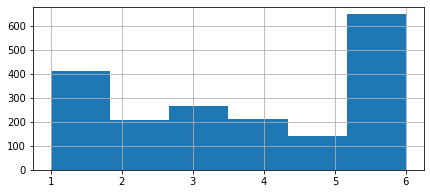

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f265'].hist(bins=Data['f265'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f265'].value_counts()[6]/Data['f265'].value_counts().sum()
weight2 = Data['f265'].value_counts()[1]/Data['f265'].value_counts().sum()
weight3 = Data['f265'].value_counts()[3]/Data['f265'].value_counts().sum()
weight_rest = (Data['f265'].value_counts().sum() - weight1*Data['f265'].value_counts().sum() - weight2*Data['f265'].value_counts().sum() - weight3*Data['f265'].value_counts().sum())/Data['f265'].value_counts().sum()
acc_cannabis=culc_acc(X_cat_pd, y_all,lable=[6,1,3],drug=['f265'])
Acc_cannabis=weight1*acc_cannabis[0]+weight2*acc_cannabis[1]+weight3*acc_cannabis[2]+weight_rest*acc_cannabis[3]
Acc_cannabis

0.6721420768263857

Choc

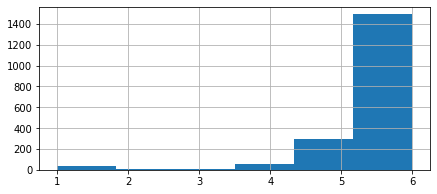

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f266'].hist(bins=Data['f266'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f266'].value_counts()[6]/Data['f266'].value_counts().sum()
weight2 = Data['f266'].value_counts()[5]/Data['f266'].value_counts().sum()
weight3 = Data['f266'].value_counts()[4]/Data['f266'].value_counts().sum()
weight_rest = (Data['f266'].value_counts().sum() - weight1*Data['f266'].value_counts().sum() - weight2*Data['f266'].value_counts().sum() - weight3*Data['f266'].value_counts().sum())/Data['f266'].value_counts().sum()
acc_chot=culc_acc(X_cat_pd, y_all,lable=[6,5,4],drug=['f266'])
Acc_choc=weight1*acc_chot[0]+weight2*acc_chot[1]+weight3*acc_chot[2]+weight_rest*acc_chot[3]
Acc_choc

0.7622897757973658

Coke

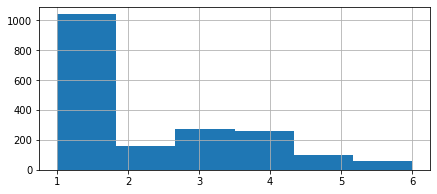

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f267'].hist(bins=Data['f267'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f267'].value_counts()[1]/Data['f267'].value_counts().sum()
weight2 = Data['f267'].value_counts()[3]/Data['f267'].value_counts().sum()
weight3 = Data['f267'].value_counts()[4]/Data['f267'].value_counts().sum()
weight_rest = (Data['f267'].value_counts().sum() - weight1*Data['f267'].value_counts().sum() - weight2*Data['f267'].value_counts().sum() - weight3*Data['f267'].value_counts().sum())/Data['f267'].value_counts().sum()
acc_coke=culc_acc(X_cat_pd, y_all,lable=[1,3,4],drug=['f267'])
Acc_coke=weight1*acc_coke[0]+weight2*acc_coke[1]+weight3*acc_coke[2]+weight_rest*acc_coke[3]
Acc_coke

0.641329600170599

Crack

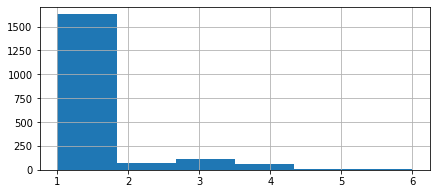

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f268'].hist(bins=Data['f268'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f268'].value_counts()[1]/Data['f268'].value_counts().sum()
weight2 = Data['f268'].value_counts()[3]/Data['f268'].value_counts().sum()
weight3 = Data['f268'].value_counts()[2]/Data['f268'].value_counts().sum()
weight_rest = (Data['f268'].value_counts().sum() - weight1*Data['f268'].value_counts().sum() - weight2*Data['f268'].value_counts().sum() - weight3*Data['f268'].value_counts().sum())/Data['f268'].value_counts().sum()
acc_crack=culc_acc(X_cat_pd, y_all,lable=[1,3,2],drug=['f268'])
Acc_crack=weight1*acc_crack[0]+weight2*acc_crack[1]+weight3*acc_crack[2]+weight_rest*acc_crack[3]
Acc_crack

0.8267468051324267

Ecstasy

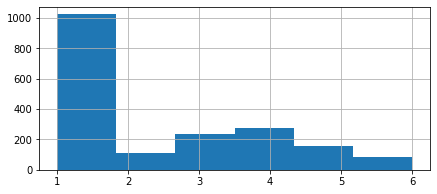

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f269'].hist(bins=Data['f269'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f269'].value_counts()[1]/Data['f269'].value_counts().sum()
weight2 = Data['f269'].value_counts()[4]/Data['f269'].value_counts().sum()
weight3 = Data['f269'].value_counts()[3]/Data['f269'].value_counts().sum()
weight_rest = (Data['f269'].value_counts().sum() - weight1*Data['f269'].value_counts().sum() - weight2*Data['f269'].value_counts().sum() - weight3*Data['f269'].value_counts().sum())/Data['f269'].value_counts().sum()
acc_ecstasy=culc_acc(X_cat_pd, y_all,lable=[1,4,3],drug=['f269'])
Acc_ecstasy=weight1*acc_ecstasy[0]+weight2*acc_ecstasy[1]+weight3*acc_ecstasy[2]+weight_rest*acc_ecstasy[3]
Acc_ecstasy

0.6638807929921636

Heroin

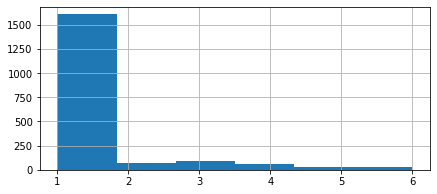

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f270'].hist(bins=Data['f270'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f270'].value_counts()[1]/Data['f270'].value_counts().sum()
weight2 = Data['f270'].value_counts()[3]/Data['f270'].value_counts().sum()
weight3 = Data['f270'].value_counts()[4]/Data['f270'].value_counts().sum()
weight_rest = (Data['f270'].value_counts().sum() - weight1*Data['f270'].value_counts().sum() - weight2*Data['f270'].value_counts().sum() - weight3*Data['f270'].value_counts().sum())/Data['f270'].value_counts().sum()
acc_heroin=culc_acc(X_cat_pd, y_all,lable=[1,3,4],drug=['f270'])
Acc_heroin=weight1*acc_heroin[0]+weight2*acc_heroin[1]+weight3*acc_heroin[2]+weight_rest*acc_heroin[3]
Acc_heroin


0.7995538580142989

Ketamine

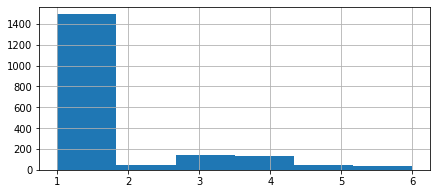

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f271'].hist(bins=Data['f271'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f271'].value_counts()[1]/Data['f271'].value_counts().sum()
weight2 = Data['f271'].value_counts()[3]/Data['f271'].value_counts().sum()
weight3 = Data['f271'].value_counts()[4]/Data['f271'].value_counts().sum()
weight_rest = (Data['f271'].value_counts().sum() - weight1*Data['f271'].value_counts().sum() - weight2*Data['f271'].value_counts().sum() - weight3*Data['f271'].value_counts().sum())/Data['f271'].value_counts().sum()
acc_ketamine=culc_acc(X_cat_pd, y_all,lable=[1,3,4],drug=['f271'])
Acc_ketamine=weight1*acc_ketamine[0]+weight2*acc_ketamine[1]+weight3*acc_ketamine[2]+weight_rest*acc_ketamine[3]
Acc_ketamine

0.7171485128501163

 Legalh

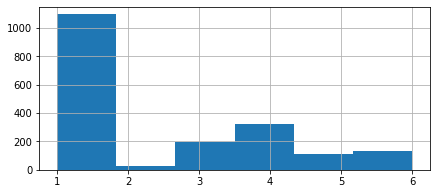

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f272'].hist(bins=Data['f272'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f272'].value_counts()[1]/Data['f272'].value_counts().sum()
weight2 = Data['f272'].value_counts()[4]/Data['f272'].value_counts().sum()
weight3 = Data['f272'].value_counts()[3]/Data['f272'].value_counts().sum()
weight_rest = (Data['f272'].value_counts().sum() - weight1*Data['f272'].value_counts().sum() - weight2*Data['f272'].value_counts().sum() - weight3*Data['f272'].value_counts().sum())/Data['f272'].value_counts().sum()
acc_legalh=culc_acc(X_cat_pd, y_all,lable=[1,4,3],drug=['f272'])
Acc_legalh=weight1*acc_legalh[0]+weight2*acc_legalh[1]+weight3*acc_legalh[2]+weight_rest*acc_legalh[3]
Acc_legalh

0.687915551679583

LSD 

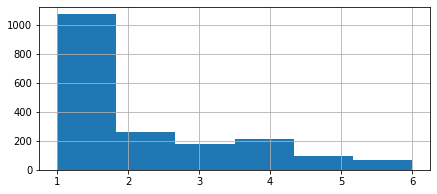

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f273'].hist(bins=Data['f273'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f273'].value_counts()[1]/Data['f273'].value_counts().sum()
weight2 = Data['f273'].value_counts()[2]/Data['f273'].value_counts().sum()
weight3 = Data['f273'].value_counts()[4]/Data['f273'].value_counts().sum()
weight_rest = (Data['f273'].value_counts().sum() - weight1*Data['f273'].value_counts().sum() - weight2*Data['f273'].value_counts().sum() - weight3*Data['f273'].value_counts().sum())/Data['f273'].value_counts().sum()
acc_lsd=culc_acc(X_cat_pd, y_all,lable=[1,2,4],drug=['f273'])
Acc_lsd=weight1*acc_lsd[0]+weight2*acc_lsd[1]+weight3*acc_lsd[2]+weight_rest*acc_lsd[3]
Acc_lsd

0.6740719989819927

Meth 

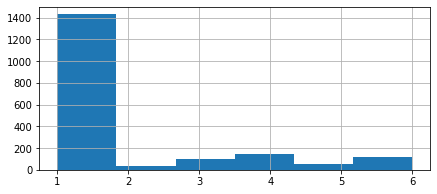

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f274'].hist(bins=Data['f274'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f274'].value_counts()[1]/Data['f274'].value_counts().sum()
weight2 = Data['f274'].value_counts()[4]/Data['f274'].value_counts().sum()
weight3 = Data['f274'].value_counts()[6]/Data['f274'].value_counts().sum()
weight_rest = (Data['f274'].value_counts().sum() - weight1*Data['f274'].value_counts().sum() - weight2*Data['f274'].value_counts().sum() - weight3*Data['f274'].value_counts().sum())/Data['f274'].value_counts().sum()
acc_meth=culc_acc(X_cat_pd, y_all,lable=[1,4,6],drug=['f274'])
Acc_meth=weight1*acc_meth[0]+weight2*acc_meth[1]+weight3*acc_meth[2]+weight_rest*acc_meth[3]
Acc_meth

0.7155622242036768

Mushrooms

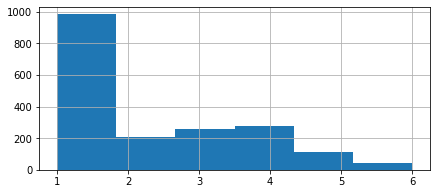

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f275'].hist(bins=Data['f275'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f275'].value_counts()[1]/Data['f275'].value_counts().sum()
weight2 = Data['f275'].value_counts()[4]/Data['f275'].value_counts().sum()
weight3 = Data['f275'].value_counts()[3]/Data['f275'].value_counts().sum()
weight_rest = (Data['f275'].value_counts().sum() - weight1*Data['f275'].value_counts().sum() - weight2*Data['f275'].value_counts().sum() - weight3*Data['f275'].value_counts().sum())/Data['f275'].value_counts().sum()
acc_mushrooms=culc_acc(X_cat_pd, y_all,lable=[1,4,3],drug=['f275'])
Acc_mushrooms=weight1*acc_mushrooms[0]+weight2*acc_mushrooms[1]+weight3*acc_mushrooms[2]+weight_rest*acc_mushrooms[3]
Acc_mushrooms

0.6884206525045529

Nicotine

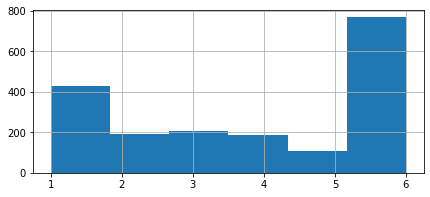

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f276'].hist(bins=Data['f276'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f276'].value_counts()[6]/Data['f276'].value_counts().sum()
weight2 = Data['f276'].value_counts()[1]/Data['f276'].value_counts().sum()
weight3 = Data['f276'].value_counts()[3]/Data['f276'].value_counts().sum()
weight_rest = (Data['f276'].value_counts().sum() - weight1*Data['f276'].value_counts().sum() - weight2*Data['f276'].value_counts().sum() - weight3*Data['f276'].value_counts().sum())/Data['f276'].value_counts().sum()
acc_nicotine=culc_acc(X_cat_pd, y_all,lable=[6,1,3],drug=['f276'])
Acc_nicotine=weight1*acc_nicotine[0]+weight2*acc_nicotine[1]+weight3*acc_nicotine[2]+weight_rest*acc_nicotine[3]
Acc_nicotine


0.6373032309969628

Semer 

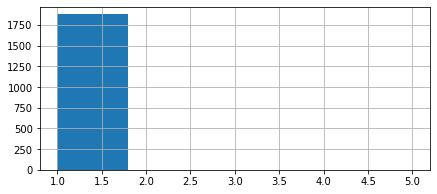

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f277'].hist(bins=Data['f277'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f277'].value_counts()[1]/Data['f277'].value_counts().sum()
weight2 = Data['f277'].value_counts()[3]/Data['f277'].value_counts().sum()
weight3 = Data['f277'].value_counts()[2]/Data['f277'].value_counts().sum()
weight_rest = (Data['f277'].value_counts().sum() - weight1*Data['f277'].value_counts().sum() - weight2*Data['f277'].value_counts().sum() - weight3*Data['f277'].value_counts().sum())/Data['f277'].value_counts().sum()
acc_semer=culc_acc(X_cat_pd, y_all,lable=[1,3,2],drug=['f277'])
Acc_semer=weight1*acc_semer[0]+weight2*acc_semer[1]+weight3*acc_semer[2]+weight_rest*acc_semer[3]
Acc_semer

0.9955019735592314

VSA

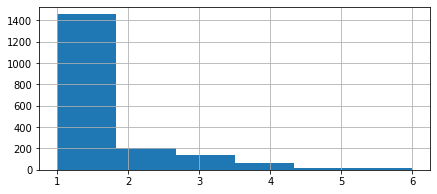

In [ ]:
Data = pd.concat([X_cat_pd, y_all], axis=1)
Data.columns = np.array(["f"+str(i) for i in range(Data.shape[1])])
Data['f278'].hist(bins=Data['f278'].nunique(), figsize=(7,3))

In [ ]:
weight1 = Data['f278'].value_counts()[1]/Data['f278'].value_counts().sum()
weight2 = Data['f278'].value_counts()[2]/Data['f278'].value_counts().sum()
weight3 = Data['f278'].value_counts()[3]/Data['f278'].value_counts().sum()
weight_rest = (Data['f278'].value_counts().sum() - weight1*Data['f278'].value_counts().sum() - weight2*Data['f278'].value_counts().sum() - weight3*Data['f278'].value_counts().sum())/Data['f278'].value_counts().sum()
acc_vsa=culc_acc(X_cat_pd, y_all,lable=[1,2,3],drug=['f278'])
Acc_vsa=weight1*acc_vsa[0]+weight2*acc_vsa[1]+weight3*acc_vsa[2]+weight_rest*acc_vsa[3]
Acc_vsa

0.7717386128827654

In [ ]:
print('accuracy_alcohol =',Acc_alcohol)
print('accuracy_amphet =',Acc_amphet)
print('accuracy_amyl =',Acc_amyl)
print('accuracy_benzos =',Acc_benzos)
print('accuracy_caff =',Acc_caff)
print('accuracy_cannabis =',Acc_cannabis)
print('accuracy_coke =',Acc_coke)
print('accuracy_crack =',Acc_crack)
print('accuracy_ecstasy =',Acc_ecstasy)
print('accuracy_heroin =',Acc_heroin)
print('accuracy_ketamine =',Acc_ketamine)
print('accuracy_legalh =',Acc_legalh)
print('accuracy_lsd =',Acc_lsd)
print('accuracy_mushrooms =',Acc_mushrooms)
print('accuracy_nicotine =',Acc_nicotine)
print('accuracy_semer =',Acc_semer)
print('accuracy_vsa =',Acc_vsa)

accuracy_alcohol = 0.6101728093765565
accuracy_amphet = 0.6308157079619897
accuracy_amyl = 0.6986084419306138
accuracy_benzos = 0.6155949209256207
accuracy_caff = 0.851006057876999
accuracy_cannabis = 0.6721420768263857
accuracy_coke = 0.641329600170599
accuracy_crack = 0.8267468051324267
accuracy_ecstasy = 0.6638807929921636
accuracy_heroin = 0.7995538580142989
accuracy_ketamine = 0.7171485128501163
accuracy_legalh = 0.687915551679583
accuracy_lsd = 0.6740719989819927
accuracy_mushrooms = 0.6884206525045529
accuracy_nicotine = 0.6373032309969628
accuracy_semer = 0.9955019735592314
accuracy_vsa = 0.7717386128827654


### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Сгенерируем данные для задачи
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

Посмотрим на данные

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


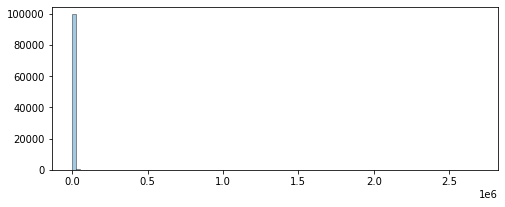

In [ ]:
fig = plt.figure(figsize=(8, 3))

sns.distplot(control, hist=True, kde=False, 
             bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


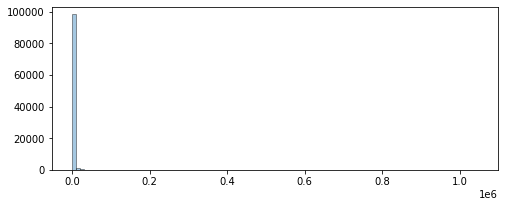

In [ ]:
fig = plt.figure(figsize=(8, 3))

sns.distplot(test, hist=True, kde=False, 
             bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

Распределение похоже на логнормальное. Если взять логарифм от данного распределения, то должно получиться нормальное распределение. Давайте сделаем это!

In [ ]:
# берем логарифм от данных
control_norm = np.log(control)
test_norm = np.log(test)

Посмотрим что получилось

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


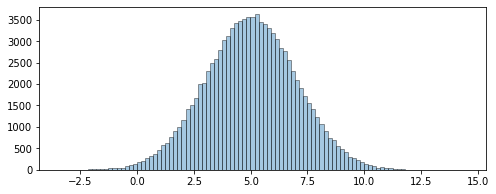

In [ ]:
fig = plt.figure(figsize=(8, 3))

sns.distplot(a, hist=True, kde=False, 
             bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

Распределение очень похоже на нормальное. Давайте убедимся в этом.

In [ ]:
import scipy.stats as ss

params_norm = ss.norm.fit(control_norm)
print(params_norm)

(4.99699581893687, 1.9968163329849473)


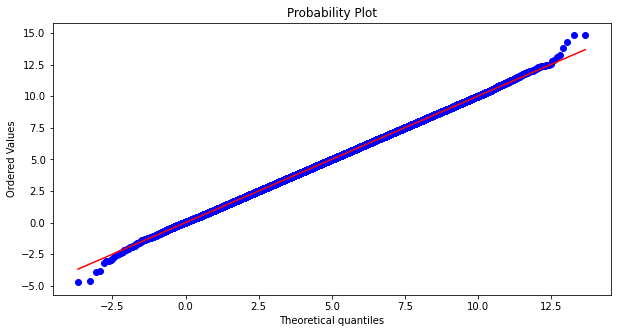

In [ ]:
fig = plt.figure(figsize=(10, 5))

ss.probplot(control_norm, dist=ss.norm(*params_norm), plot=plt)

plt.show()

Так как распределения получились нормальные, то статистический тест будем делать для этих распределений (для удобства работы).
Посмотрим на стандартоное отклонение и на среднее значение в данных

In [ ]:
control_std = round(np.std(control_norm),2)
test_std = round(np.std(control_norm),2)
control_mean=round(np.mean(control_norm),2)
test_mean=round(np.mean(test_norm),2)
print('control_std =',control_std)
print('test_std =',test_std)
print('control_mean =',control_mean)
print('test_mean =',test_mean)

control_std = 2.0
test_std = 2.0
control_mean = 5.0
test_mean = 5.04


Распределения нормальные с одинаковыми стандартными отклонениями. Мы можем применить к таким распределениям t - критерий Стьюдента.

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(control_norm,test_norm)

Ttest_indResult(statistic=-4.289448183428564, pvalue=1.7920149257171948e-05)

Видно что p-value меньше 0.01, значит можно отвергнуть гипотезу о том, что различие средних значений между двумя группами случайно.

### **Задание №4 (*)**. В прошлом задании мы улавливали статистически значимое различие в средних в 0.04 единицы на выборке из 100000 клиентов. Насколько больше нам требуется собрать клиентов, чтобы уловить различие в 0.02?

In [ ]:
# <YOUR_CODE_HERE>